<a href="https://colab.research.google.com/github/RajKumarSingh065/Bitcoin-Price-Prediction/blob/main/project_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BTC-USD.csv',parse_dates=['Date'],index_col='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Timestamp
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,1.410912e+09
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,1.410998e+09
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,1.411085e+09
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,1.411171e+09
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,1.411258e+09


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Timestamp
Date,,,,,,,
2022-03-21,41246.13281,41454.41016,40668.04297,41077.99609,41077.99609,2.461554e+10,1.647821e+09
2022-03-22,41074.10547,43124.70703,40948.28125,42358.80859,42358.80859,3.200465e+10,1.647907e+09
2022-03-23,42364.37891,42893.50781,41877.50781,42892.95703,42892.95703,2.524294e+10,1.647994e+09
2022-03-24,42886.65234,44131.85547,42726.16406,43960.93359,43960.93359,3.104299e+10,1.648080e+09
2022-03-25,43958.67578,44982.51953,43711.87109,44395.96484,44395.96484,3.037942e+10,1.648166e+09


In [ ]:
df.drop(['Volume','Adj Close'],axis=1,inplace=True)

In [ ]:
df.shape

(2747, 5)

In [ ]:
df.tail()

,Open,High,Low,Close,Timestamp
Date,,,,,
2022-03-21,41246.13281,41454.41016,40668.04297,41077.99609,1.647821e+09
2022-03-22,41074.10547,43124.70703,40948.28125,42358.80859,1.647907e+09
2022-03-23,42364.37891,42893.50781,41877.50781,42892.95703,1.647994e+09
2022-03-24,42886.65234,44131.85547,42726.16406,43960.93359,1.648080e+09
2022-03-25,43958.67578,44982.51953,43711.87109,44395.96484,1.648166e+09


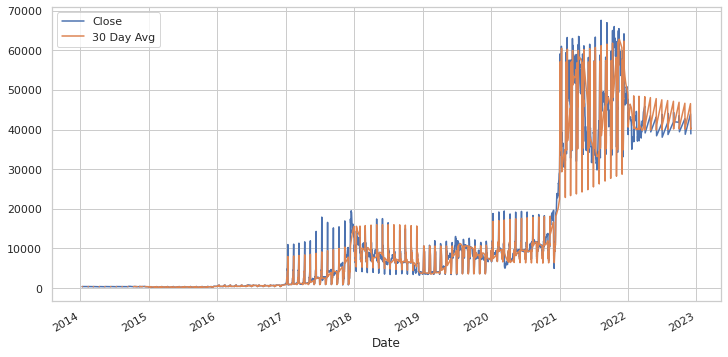

In [ ]:
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the
#rolling 30 day average against the Close Price
plt.legend()

In [ ]:
df['Average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

In [ ]:
df.head()

,Open,High,Low,Close,Timestamp,Average
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,1.410912e+09,460.948509
2014-09-18,456.859985,456.859985,413.104004,424.440002,1.410998e+09,437.815994
2014-09-19,424.102997,427.834991,384.532013,394.795990,1.411085e+09,407.816498
2014-09-20,394.673004,423.295990,389.882996,408.903992,1.411171e+09,404.188996
2014-09-21,408.084991,412.425995,393.181000,398.821014,1.411258e+09,403.128250


In [ ]:
df['Prediction']=df[['Close']].shift(-30)

In [ ]:
df.head()

,Open,High,Low,Close,Timestamp,Average,Prediction
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,1.410912e+09,460.948509,383.757996
2014-09-18,456.859985,456.859985,413.104004,424.440002,1.410998e+09,437.815994,391.441986
2014-09-19,424.102997,427.834991,384.532013,394.795990,1.411085e+09,407.816498,389.545990
2014-09-20,394.673004,423.295990,389.882996,408.903992,1.411171e+09,404.188996,382.845001
2014-09-21,408.084991,412.425995,393.181000,398.821014,1.411258e+09,403.128250,386.475006


In [ ]:
df['Returns']=df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Timestamp,Average,Prediction,Returns
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,1.410912e+09,460.948509,383.757996,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,1.410998e+09,437.815994,391.441986,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,1.411085e+09,407.816498,389.545990,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,1.411171e+09,404.188996,382.845001,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,1.411258e+09,403.128250,386.475006,-0.024659


Text(0, 0.5, '$ Price')

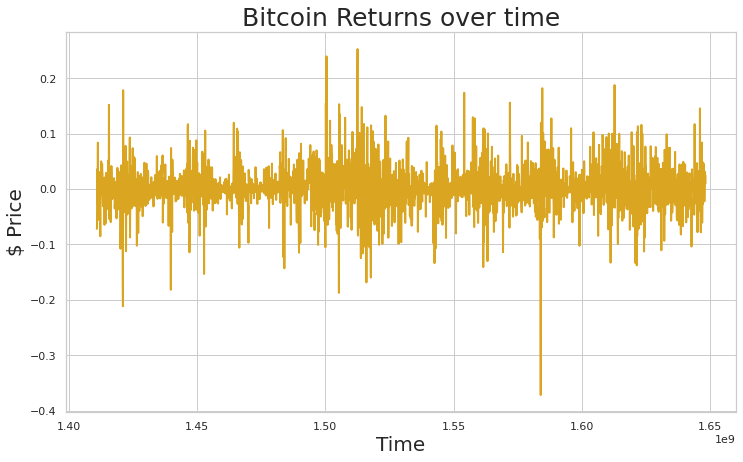

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df["Timestamp"], df["Returns"], color='goldenrod', lw=2)
plt.title("Bitcoin Returns over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

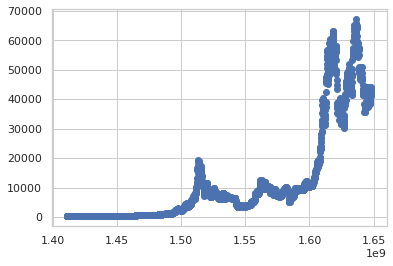

In [ ]:
x=df['Timestamp']
y=df['Average']
plt.scatter(x, y)
plt.show()

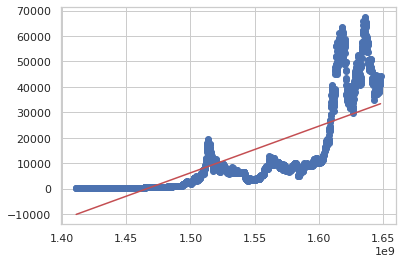

In [ ]:
from scipy import stats

x = df["Timestamp"]
y = df["Close"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,color='r')
plt.show()

In [ ]:
!pip install --pre pycaret

In [ ]:
dfnew = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")
dfnew

,Date,Open,High,Low,Close,Adj Close,Volume,Timestamp
0,17-09-2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,1.410912e+09
1,18-09-2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,1.410998e+09
2,19-09-2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,1.411085e+09
3,20-09-2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,1.411171e+09
4,21-09-2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,1.411258e+09
...,...,...,...,...,...,...,...,...
2742,21-03-2022,41246.132810,41454.410160,40668.042970,41077.996090,41077.996090,2.461554e+10,1.647821e+09
2743,22-03-2022,41074.105470,43124.707030,40948.281250,42358.808590,42358.808590,3.200465e+10,1.647907e+09
2744,23-03-2022,42364.378910,42893.507810,41877.507810,42892.957030,42892.957030,2.524294e+10,1.647994e+09
2745,24-03-2022,42886.652340,44131.855470,42726.164060,43960.933590,43960.933590,3.104299e+10,1.648080e+09


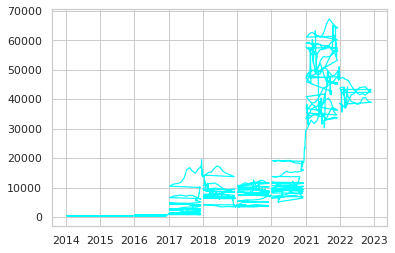

In [ ]:
plt.plot(df['Average'],color='cyan',lw=1.2)

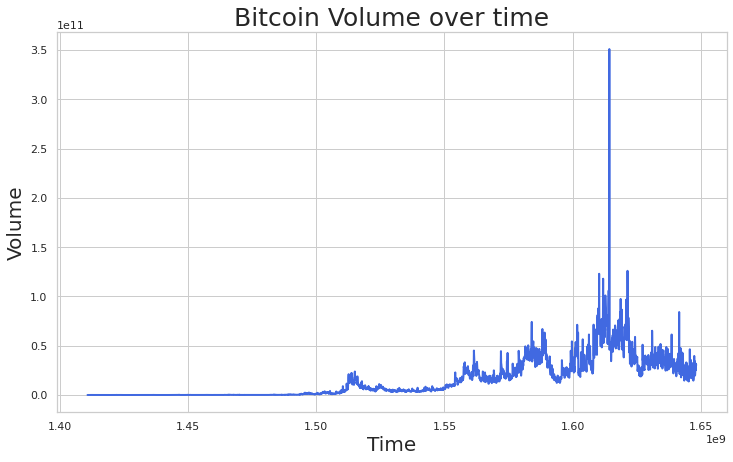

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(dfnew["Timestamp"], dfnew["Volume"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [ ]:
#splitting data 2 sets
#70% data is allocated for training and 30% data is allocated for testing

required_features = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
output_label = 'Close'
x_train, x_test, y_train, y_test = train_test_split(
    dfnew[required_features], df[output_label], test_size=0.05, random_state=0)

In [ ]:
#creating model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
#predicitng price
future_set = dfnew.shift(periods=30).tail(30)

In [ ]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

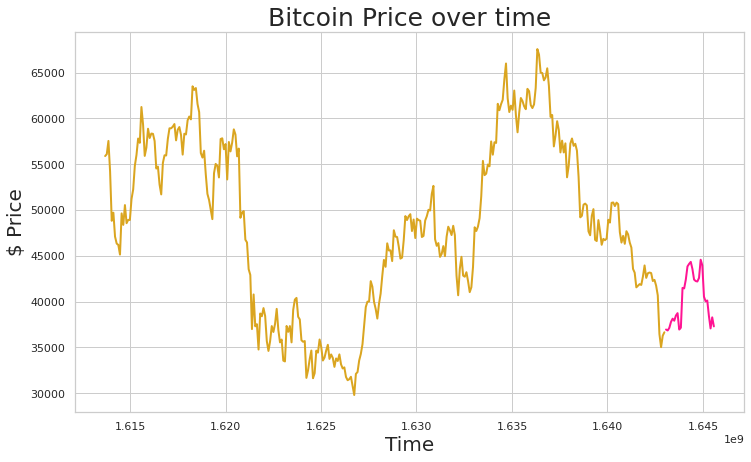

In [ ]:
#plotting prediction graph
plt.figure(figsize = (12, 7))
plt.plot(dfnew["Timestamp"][-400:-60], dfnew["Adj Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)